##Importer library

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#lire donnees

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
data=pd.read_csv("/content/drive/MyDrive/Pokemon.csv")

#Eploratory data analysis(EDA,exploration de donnees)

#moyenne et variance
#Question1: 
Trouver les variances et moyennes des variables quantitatives

In [38]:
variables_quantitatif=data.select_dtypes('int').columns
variables_quantitatif=variables_quantitatif.delete(0)
variables_quantitatif

Index(['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed',
       'Generation'],
      dtype='object')

In [39]:
info_quantitatif={
    "table": [],
    "moyenne":[],
    "variance":[]
}

for t in variables_quantitatif:
  info_quantitatif['table'].append(t)
  info_quantitatif['moyenne'].append(data[t].mean())
  info_quantitatif['variance'].append(data[t].std())
  print(f"col: {t} => [ moy: {data[t].mean()} | var : {data[t].std()} ]")



#info_quantitatif 

col: Total => [ moy: 439.31483253588516 | var : 121.970701133336 ]
col: HP => [ moy: 70.06794258373206 | var : 26.671410786271366 ]
col: Attack => [ moy: 80.46698564593301 | var : 32.41366533109384 ]
col: Defense => [ moy: 74.66124401913875 | var : 31.237903105121497 ]
col: Sp. Atk => [ moy: 73.02200956937799 | var : 32.724797178346144 ]
col: Sp. Def => [ moy: 72.288995215311 | var : 28.074147913651124 ]
col: Speed => [ moy: 68.80765550239235 | var : 30.21009350806888 ]
col: Generation => [ moy: 4.454545454545454 | var : 2.2690426418698078 ]


In [40]:
data.describe()

,ID,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000
mean,440.769378,439.314833,70.067943,80.466986,74.661244,73.022010,72.288995,68.807656,4.454545
std,262.517231,121.970701,26.671411,32.413665,31.237903,32.724797,28.074148,30.210094,2.269043
min,1.000000,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000
25%,212.000000,330.000000,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000,3.000000
50%,436.000000,458.000000,68.000000,77.000000,70.000000,65.000000,70.000000,65.000000,5.000000
75%,670.000000,515.000000,82.000000,100.000000,90.000000,95.000000,90.000000,90.000000,6.000000
max,898.000000,1125.000000,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000,8.000000


#Question2
Faite une analyse univariee des variables

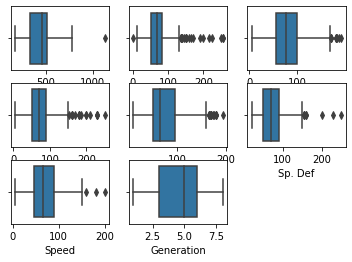

<Figure size 864x576 with 0 Axes>

In [41]:
k=1

for i in  variables_quantitatif:
  plt.subplot(3, 3, k)
  
  k+=1
  sns.boxplot(x=i, data=data)
plt.figure(figsize=(12, 8))
plt.show()

In [42]:
variables_quantitatif

Index(['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed',
       'Generation'],
      dtype='object')

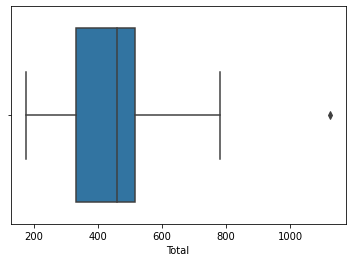

In [43]:
sns.boxplot(x='Total',data=data)

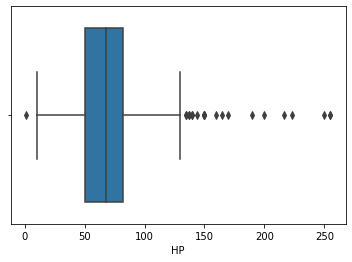

In [44]:
sns.boxplot(x='HP',data=data)

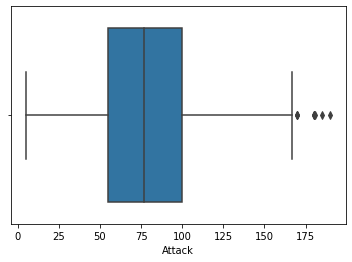

In [45]:
sns.boxplot(x='Attack',data=data)

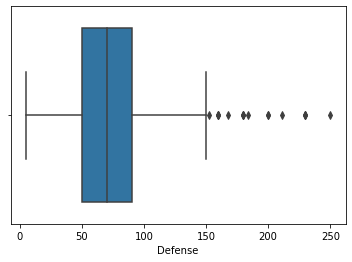

In [46]:
sns.boxplot(x='Defense',data=data)

In [47]:
variables_quantitatif


Index(['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed',
       'Generation'],
      dtype='object')

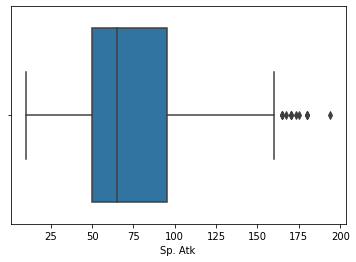

In [48]:
sns.boxplot(x='Sp. Atk',data=data)

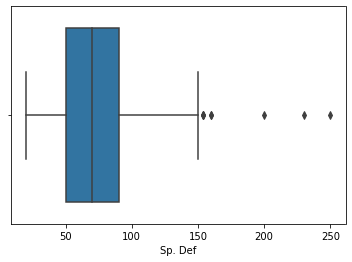

In [49]:
sns.boxplot(x='Sp. Def',data=data)

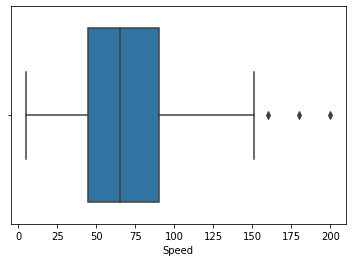

In [50]:
sns.boxplot(x='Speed',data=data)

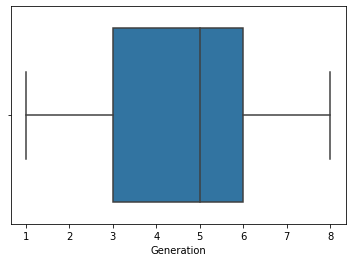

In [51]:
sns.boxplot(x='Generation',data=data)

In [52]:
variable_qualitatif=data.select_dtypes('O').columns
variable_qualitatif

Index(['Name', 'Form', 'Type1', 'Type2'], dtype='object')

In [53]:
data['Type1'].value_counts()

Water       134
Normal      115
Grass        91
Psychic      81
Bug          81
Fire         65
Electric     62
Rock         60
Dark         46
Fighting     42
Ghost        42
Dragon       41
Poison       41
Ground       41
Ice          37
Steel        36
Fairy        22
Flying        8
Name: Type1, dtype: int64

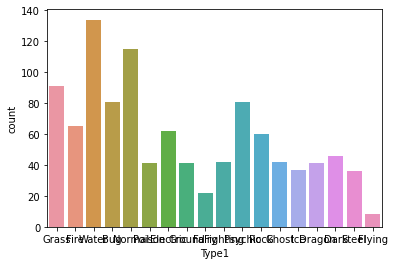

In [54]:
#plt.xticks(data['Type1'].unique(),rotation="veritcal")
sns.countplot(x='Type1',data=data )
#plt.show()

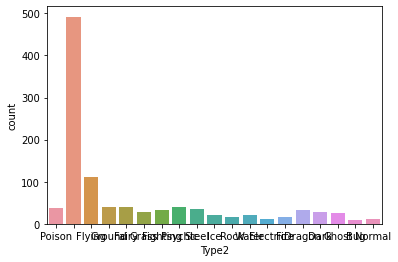

In [55]:
sns.countplot(x='Type2',data=data )

#Question3
Faite une analyse multivariee des variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f764b10d7d0>,
      dtype=object)

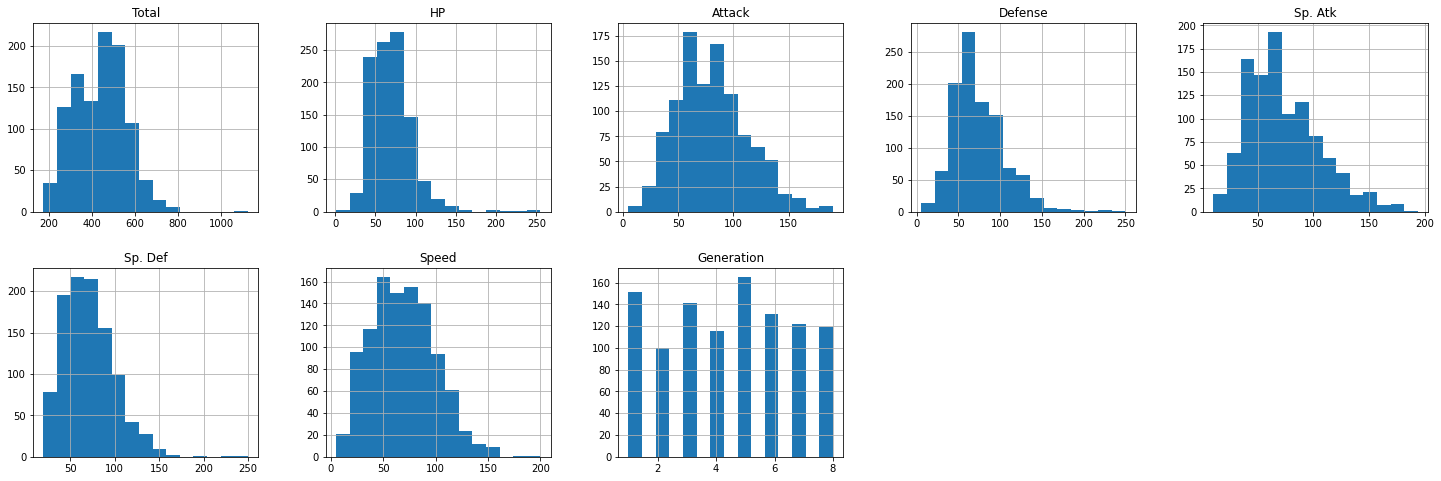

In [56]:
data[variables_quantitatif].hist(bins=15, figsize=(25,17),layout=(4,5))

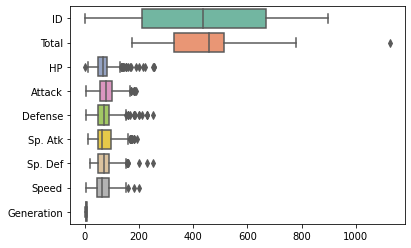

In [57]:
sns.boxplot(data=data,orient="h",palette="Set2")

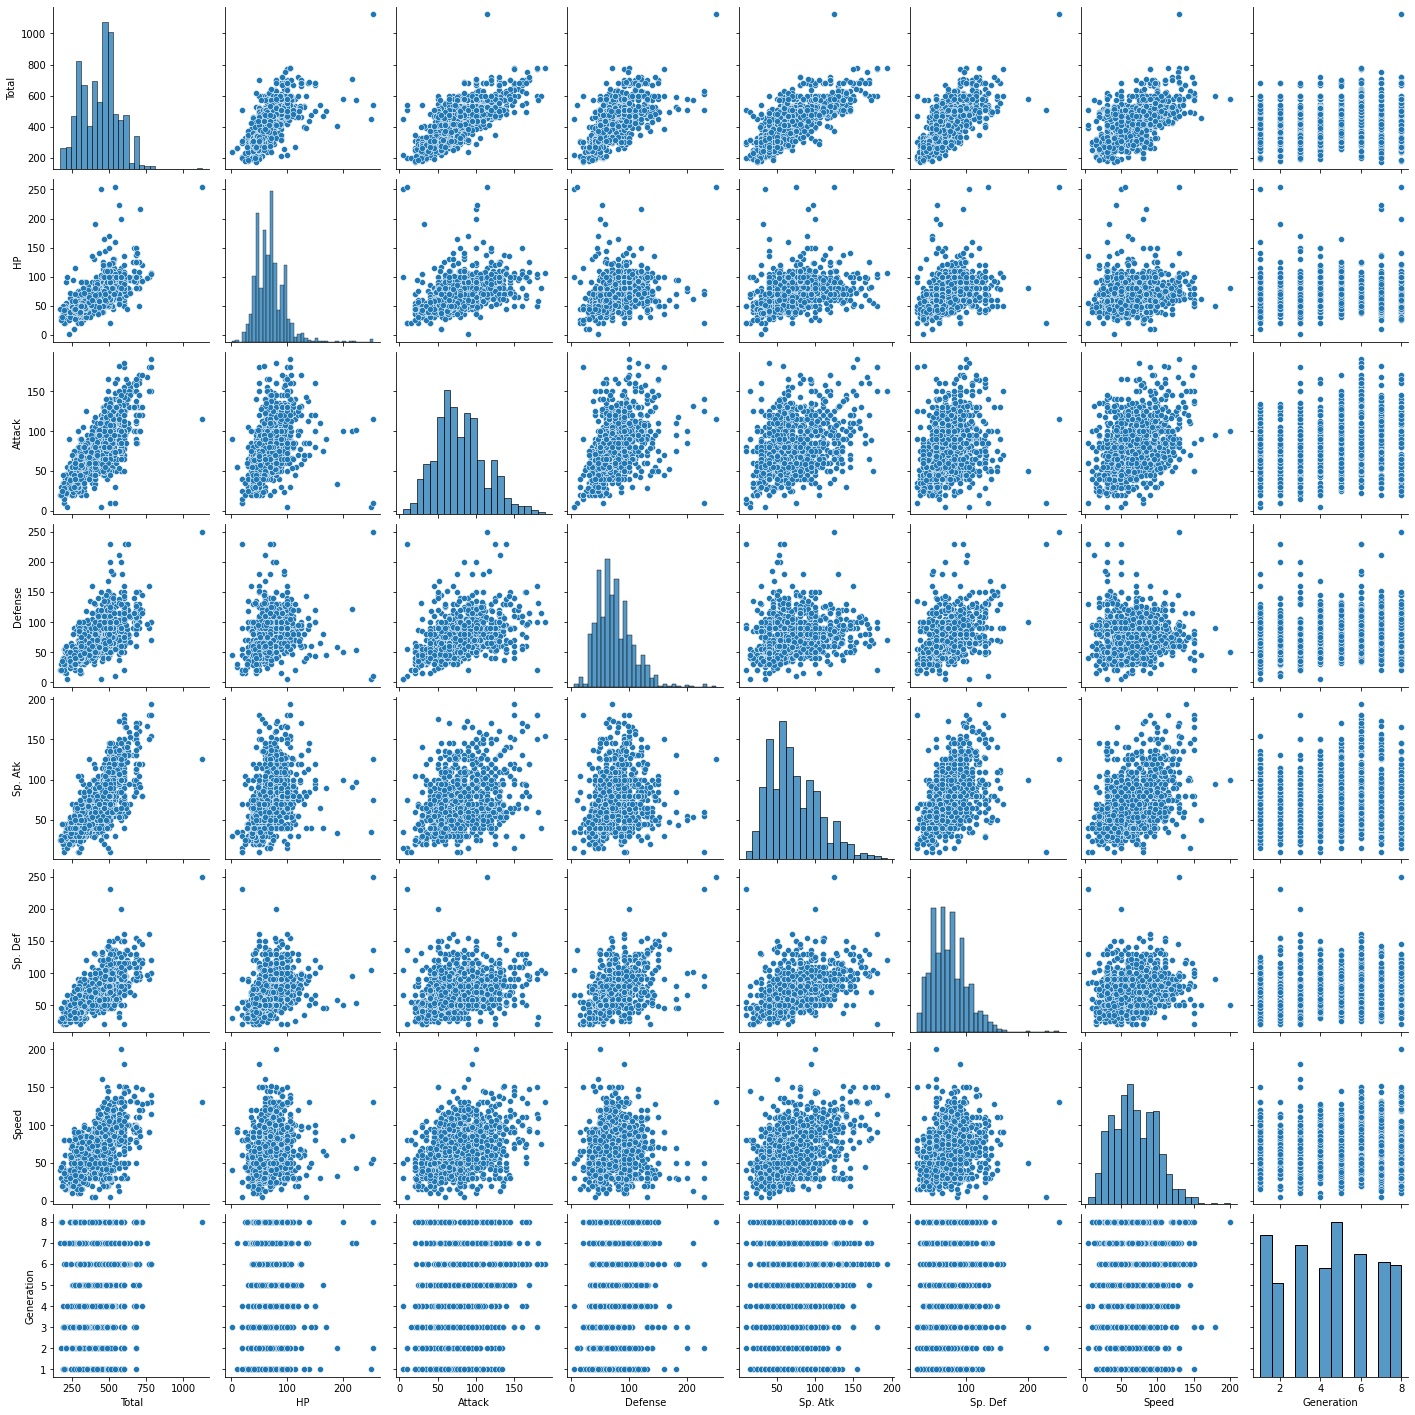

In [58]:
sns.pairplot(data[variables_quantitatif])

In [59]:
data_cor=data.corr()
data_cor

,ID,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
ID,1.000000,0.136250,0.117898,0.122770,0.098866,0.096403,0.083987,0.029577,0.802732
Total,0.136250,1.000000,0.650805,0.733256,0.629798,0.732996,0.720227,0.561562,0.179859
HP,0.117898,0.650805,1.000000,0.444125,0.300300,0.371534,0.393311,0.189705,0.097366
Attack,0.122770,0.733256,0.444125,1.000000,0.457671,0.368751,0.267633,0.374018,0.190537
Defense,0.098866,0.629798,0.300300,0.457671,1.000000,0.223481,0.544191,0.004756,0.130149
Sp. Atk,0.096403,0.732996,0.371534,0.368751,0.223481,1.000000,0.511980,0.445640,0.119226
Sp. Def,0.083987,0.720227,0.393311,0.267633,0.544191,0.511980,1.000000,0.226861,0.104530
Speed,0.029577,0.561562,0.189705,0.374018,0.004756,0.445640,0.226861,1.000000,0.074903
Generation,0.802732,0.179859,0.097366,0.190537,0.130149,0.119226,0.104530,0.074903,1.000000


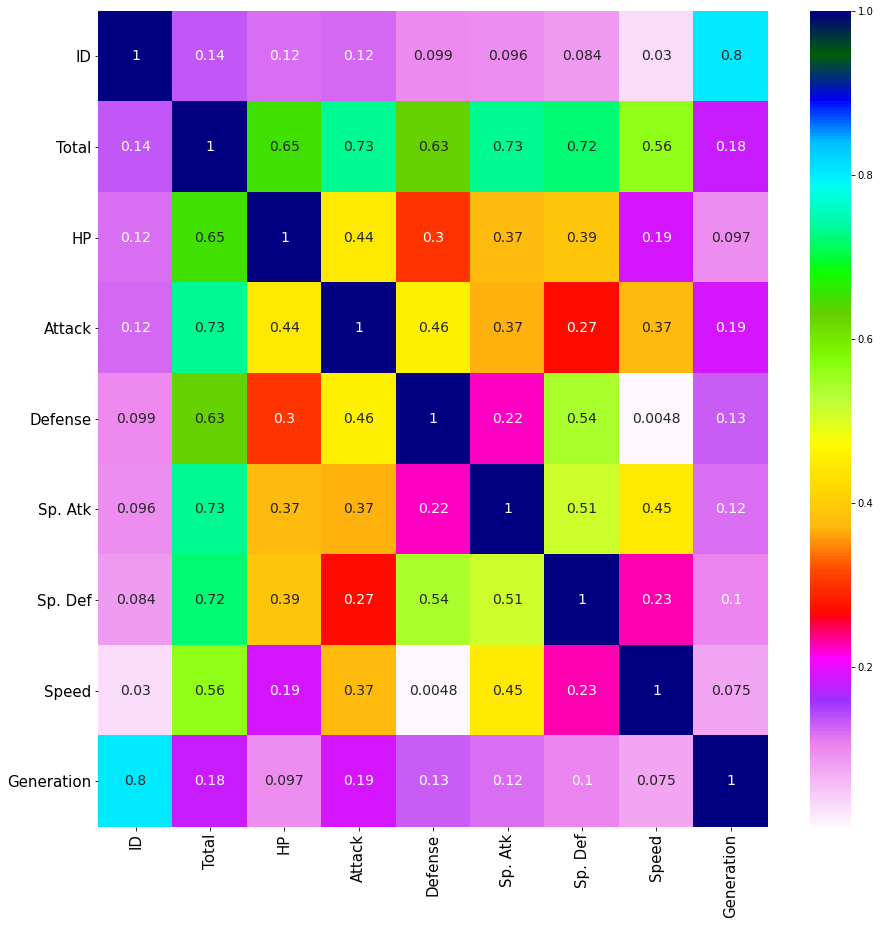

In [69]:
sns.heatmap(data_cor, xticklabels = data_cor.columns.values, yticklabels = data_cor.columns.values, annot = True, annot_kws={'size':14},cmap='gist_ncar_r')
heat_map = plt.gcf()
heat_map.set_size_inches(15,15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

#Question4
Verifier les valeurs manquantes

In [ ]:
for col in data.columns:
  if data[col].isna().sum() !=0:
    print(f"{col}values null {data[col].isna().sum()}")

In [ ]:
data.isna().sum()

#Question5
Verifier les valeurs doubles

In [ ]:
data.duplicated().sum()

#Question6
Verifier les valeurs extremes (les differentes methodes expliquees)

In [61]:
data.describe()

,ID,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000
mean,440.769378,439.314833,70.067943,80.466986,74.661244,73.022010,72.288995,68.807656,4.454545
std,262.517231,121.970701,26.671411,32.413665,31.237903,32.724797,28.074148,30.210094,2.269043
min,1.000000,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000
25%,212.000000,330.000000,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000,3.000000
50%,436.000000,458.000000,68.000000,77.000000,70.000000,65.000000,70.000000,65.000000,5.000000
75%,670.000000,515.000000,82.000000,100.000000,90.000000,95.000000,90.000000,90.000000,6.000000
max,898.000000,1125.000000,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000,8.000000


Donc ici on remarque seulement les colonnes Defence et HP ont  des valeurs extremes

In [63]:

for i in variables_quantitatif:
  print(f"{i} => {data[i].skew()}")

Total => 0.22969597046648757
HP => 1.8142798483561513
Attack => 0.4864136602777822
Defense => 1.174320283585493
Sp. Atk => 0.7234109107562754
Sp. Def => 0.9357547413131778
Speed => 0.43335419779733975
Generation => -0.026518586968765138


In [ ]:
### Reponse voir les boxplots 

#Data preprocessing(preparation de donnees)

#Question7:
regler le probleme des valeurs manquantes (les differentes methodes expliquees)

#Question8
Transformer les variables categoriques(labelencoder, get_dummies)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=[]
k=0
df_label_encoder=pd.DataFrame({})
for i in variable_qualitatif:
  labelencoder = LabelEncoder()
  resultat =labelencoder.fit_transform(data[i])
  label_encoder.append(pd.DataFrame(resultat, columns=[f"encoding_{i}"])) 
  if k != len(label_encoder)-1:
    keys=label_encoder[-2].columns
    df_label_encoder=pd.concat(label_encoder[0], label_encoder[k+1])
    
  k+=1


In [ ]:
#type(label_encoder)
df_result=pd.DataFrame(df_label_encoder)
df_result

""


In [ ]:
dt=pd.get_dummies(data)
dt

,ID,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Name_Abomasnow,Name_Abra,Name_Absol,Name_Accelgor,Name_Aegislash,Name_Aerodactyl,Name_Aggron,Name_Aipom,Name_Alakazam,Name_Alcremie,Name_Alomomola,Name_Altaria,Name_Amaura,Name_Ambipom,Name_Amoonguss,Name_Ampharos,Name_Anorith,Name_Appletun,Name_Applin,Name_Araquanid,Name_Arbok,Name_Arcanine,Name_Arceus,Name_Archen,Name_Archeops,Name_Arctovish,Name_Arctozolt,Name_Ariados,Name_Armaldo,Name_Aromatisse,Name_Aron,...,Form_Wash Rotom,Form_White Kyurem,Form_Zen Mode,Type1_Bug,Type1_Dark,Type1_Dragon,Type1_Electric,Type1_Fairy,Type1_Fighting,Type1_Fire,Type1_Flying,Type1_Ghost,Type1_Grass,Type1_Ground,Type1_Ice,Type1_Normal,Type1_Poison,Type1_Psychic,Type1_Rock,Type1_Steel,Type1_Water,Type2_,Type2_Bug,Type2_Dark,Type2_Dragon,Type2_Electric,Type2_Fairy,Type2_Fighting,Type2_Fire,Type2_Flying,Type2_Ghost,Type2_Grass,Type2_Ground,Type2_Ice,Type2_Normal,Type2_Poison,Type2_Psychic,Type2_Rock,Type2_Steel,Type2_Water
0,1,318,45,49,49,65,65,45,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2,405,60,62,63,80,80,60,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,3,525,80,82,83,100,100,80,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,309,39,52,43,60,50,65,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,405,58,64,58,80,65,80,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,896,580,100,145,130,65,110,30,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1041,897,580,100,65,60,145,80,130,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1042,898,500,100,80,80,80,80,80,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1043,898,680,100,165,150,85,130,50,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


#Question9
Traiter les valeurs extremes(les differentes methodes expliquees)

#Log tranform
pour la colonne Defense

In [66]:
data["Log_Defense"] = data["Defense"].map(lambda i: np.log(i) if i > 0 else 0) 
print(data['Defense'].skew())
print(data['Log_Defense'].skew())

1.174320283585493
-0.6900165347763096


#Methode basee sur les quartiles

In [67]:

data['Defense']=np.where(data['Defense']<data['Defense'].quantile(0.10), data['Defense'].quantile(0.10), data['Defense'])
data['Defense']=np.where(data['Defense']>data['Defense'].quantile(0.90), data['Defense'].quantile(0.90), data['Defense'])
print(f"{'Defense' }: {data['Defense'].skew()} ")

Defense: 0.3166965432254143 
